<a href="https://colab.research.google.com/github/heber4543/stress_pre_post/blob/main/analisis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [123]:
# extracción de datos
path = '/content/drive/MyDrive/analisis_datos/estres_pre_post/data.xlsx'
data = pd.read_excel (path, sheet_name=None)
pre = data ['pre']
post = data ['post']

In [125]:
# funcion para quitar acentos
def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# funcion para aplicar todas las transformaciones necesarias
def transform_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = remove_accents(text)
        if text.endswith('.'):
            text = text[:-1]
    return text

In [126]:
# aplicar funcion a ambos df
pre = pre.applymap(transform_text)
post = post.applymap(transform_text)

In [127]:
# eliminar columnas innecesarias
pre = pre.drop(columns=[1.3, 1.4, 1.5, 2.3, 2.4, 3.3,
                        3.4, 6.5, 6.6, 7.5, 11.1, 15.1])
post = post.drop(columns=[1.3, 1.4, 1.5, 2.3, 2.4, 3.3,
                          3.4, 6.5, 6.6, 7.5, 11.1, 15.1])

In [128]:
# guardad nuevas hojas de calculo
pre.to_csv('pre.csv', index=False)
post.to_csv('post.csv', index=False)

In [170]:
# dataframes corregidos
path1 = '/content/drive/MyDrive/analisis_datos/estres_pre_post/pre.csv'
path2 = '/content/drive/MyDrive/analisis_datos/estres_pre_post/post.csv'

pre_new = pd.read_csv (path1)
post_new = pd.read_csv (path2)

In [130]:
# cambiar valores con si, a veces, no
reemplazos = {'si': 2, 'a veces': 1, 'no': 0}
columnas_reemplazo = ['1.1', '2.1', '3.1', '5.2', '5.3',
                      '5.4', '7.1', '7.4', '8.1']

def reemplazo (df):
  for i in columnas_reemplazo:
    df[i] = df[i].replace(reemplazos)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2], ordered=False)
  return df

In [131]:
# cambiar valores con si, no
reemplazos1 = {'si': 1, 'no': 0}
columnas_reemplazo1 = ['5.1', '6.1']

def reemplazo1 (df):
  for i in columnas_reemplazo1:
    df[i] = df[i].replace(reemplazos1)
    df[i] = pd.Categorical(df[i], categories=[0, 1], ordered=False)
  return df

In [146]:
# cambiar valores con todos los dias, una vez por semana, cada 15 dias, nunca
reemplazos2 = {'todos los dias': 3, 'una vez por semana': 2,
               'cada 15 dias': 1, 'nunca': 0}
columnas_reemplazo2 = ['1.2', '2.2', '6.2', '7.2']

def reemplazo2 (df):
  for i in columnas_reemplazo2:
    df[i] = df[i].replace(reemplazos2)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=True)
  return df

In [133]:
# cambiar valores con todos los dias, una vez por semana, cada 15 dias
reemplazos3 = {'todos los dias': 2, 'una vez por semana': 1, 'cada 15 dias': 0}
columnas_reemplazo3 = ['3.2']

def reemplazo3 (df):
  for i in columnas_reemplazo3:
    df[i] = df[i].replace(reemplazos3)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2], ordered=True)
  return df

In [134]:
# cambiar valores con duermo las horas necesarias, hay dias que no duermo
#lo suficiente, paso varios dias sin dormir
reemplazos4 = {'duermo las horas necesarias': 2,
               'hay dias que no duermo lo suficiente': 1,
               'paso varios dias sin dormir': 0}
columnas_reemplazo4 = ['4.1']

def reemplazo4 (df):
  for i in columnas_reemplazo4:
    df[i] = df[i].replace(reemplazos4)
    df[i] = pd.Categorical(df[i], categories=[2, 1, 0], ordered=True)
  return df

In [135]:
# cambiar valores con varias veces, una vez y nunca
reemplazos5 = {'varias veces': 2, 'una vez': 1, 'nunca': 0}
columnas_reemplazo5 = ['5.5']

def reemplazo5 (df):
  for i in columnas_reemplazo5:
    df[i] = df[i].replace(reemplazos5)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2], ordered=True)
  return df

In [136]:
# cambiar valores con siempre, frecuentemente, a veces y nunca
reemplazos6 = {'siempre': 3, 'frecuentemente': 2, 'a veces': 1, 'nunca': 0}
columnas_reemplazo6 = ['6.3', '6.4']

def reemplazo6 (df):
  for i in columnas_reemplazo6:
    df[i] = df[i].replace(reemplazos6)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=True)
  return df

In [137]:
# cambiar valores con varias veces al día, cada que puedo,
# cada vez que me comparten, nunca
reemplazos7 = {'varias veces al día': 3, 'cada que puedo': 2,
               'cada vez que me comparten': 1, 'nunca': 0}
columnas_reemplazo7 = ['7.3']

def reemplazo7 (df):
  for i in columnas_reemplazo7:
    df[i] = df[i].replace(reemplazos7)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=True)
  return df

In [138]:
# cambiar valores con todos los dias, una o dos veces a la semana, cada 15 dias
reemplazos9 = {'todos los dias': 2, 'una o dos veces a la semana': 1,
               'cada 15 dias': 0}
columnas_reemplazo9 = ['8.2']

def reemplazo9 (df):
  for i in columnas_reemplazo9:
    df[i] = df[i].replace(reemplazos9)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2], ordered=True)
  return df

In [139]:
# cambiar valores con no tomo, cerveza, tequila o vodka, cualquier cosa
reemplazos10 = {'cualquier cosa': 3, 'no tomo': 2, 'cerveza': 1, 'tequila o vodka': 0}
columnas_reemplazo10 = ['8.3']

def reemplazo10 (df):
  for i in columnas_reemplazo10:
    df[i] = df[i].replace(reemplazos10)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [140]:
# cambiar valores con no tomo, entre 15 y 18 años,
# entre 11 y 15 años, antes de los 11
reemplazos11 = {'entre 15 y 18 anos': 3, 'entre 11 y 15 anos': 2,
                'antes de los 11': 1, 'no tomo': 0}
columnas_reemplazo11 = ['8.4']

def reemplazo11 (df):
  for i in columnas_reemplazo11:
    df[i] = df[i].replace(reemplazos11)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [172]:
# cambiar valores con no tomo, con amigos, con amigos y familiares,
# con amigos, familia y solo
reemplazos12 = {'con amigos, familia y solo': 3, 'con amigos y familiares': 2,
                'con amigos': 1, 'no tomo': 0}
columnas_reemplazo12 = ['8.5']

def reemplazo12 (df):
  for i in columnas_reemplazo12:
    df[i] = df[i].replace(reemplazos12)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [155]:
# cambiar valores con nunca, si en un grupo de amigos / familia,
# si en la escuela / barrio, en todas partes
reemplazos13 = {'en todas partes': 3,
                'si en un grupo de amigos / familia': 2,
                'si en la escuela / barrio': 1, 'nunca': 0}
columnas_reemplazo13 = ['10.1']

def reemplazo13 (df):
  for i in columnas_reemplazo13:
    df[i] = df[i].replace(reemplazos13)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [160]:
# cambiar valores con nunca, si en un grupo de amigos / familia,
# si en la escuela / barrio, en todas partes
reemplazos14 = {'si en todas partes': 3,
                'si a amigos / familia': 2,
                'si en la escuela / barrio': 1, 'nunca': 0}
columnas_reemplazo14 = ['10.2']

def reemplazo14 (df):
  for i in columnas_reemplazo14:
    df[i] = df[i].replace(reemplazos14)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [165]:
# cambiar valores con muchas veces, varias veces, una vez y nunca
reemplazos15 = {'muchas veces': 3,
                'varias veces': 2,
                'una vez': 1, 'nunca': 0}
columnas_reemplazo15 = ['10.3']

def reemplazo15 (df):
  for i in columnas_reemplazo15:
    df[i] = df[i].replace(reemplazos15)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=True)
  return df

In [168]:
# cambiar valores con nunca me he pelado, despues de los 15 anos,
# entre los 11 y los 15 anos, antes los 11
reemplazos16 = {'antes los 11': 3,
                'entre los 11 y los 15 anos': 2,
                'despues de los 15 anos': 1,
                'nunca me he peleado': 0}
columnas_reemplazo16 = ['10.4']

def reemplazo16 (df):
  for i in columnas_reemplazo16:
    df[i] = df[i].replace(reemplazos16)
    df[i] = pd.Categorical(df[i], categories=[0, 1, 2, 3], ordered=False)
  return df

In [ ]:
reemplazo16 (pre_new)
reemplazo16 (post_new)
reemplazo15 (pre_new)
reemplazo15 (post_new)
reemplazo14 (pre_new)
reemplazo14 (post_new)
reemplazo13 (pre_new)
reemplazo13 (post_new)
reemplazo12 (pre_new)
reemplazo12 (post_new)
reemplazo11 (pre_new)
reemplazo11 (post_new)
reemplazo10 (pre_new)
reemplazo10 (post_new)
reemplazo9 (pre_new)
reemplazo9 (post_new)
reemplazo7 (pre_new)
reemplazo7 (post_new)
reemplazo6 (pre_new)
reemplazo6 (post_new)
reemplazo5 (pre_new)
reemplazo5 (post_new)
reemplazo4 (pre_new)
reemplazo4 (post_new)
reemplazo3 (pre_new)
reemplazo3 (post_new)
reemplazo2 (pre_new)
reemplazo2 (post_new)
reemplazo1 (pre_new)
reemplazo1 (post_new)
reemplazo (pre_new)
reemplazo (post_new)

In [208]:
# funcion para graficos de pastel
def graficar_pastel(df, columna):
    frecuencias = df[columna].value_counts()

    colores = ['grey', 'lightgrey', 'white']
    colores = colores[:len(frecuencias)]
    wedgeprops = {'edgecolor': 'black', 'linewidth': 1}
    plt.figure(figsize=(8, 8))
    plt.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%',
            startangle=140, colors=colores, wedgeprops=wedgeprops)

    plt.title(f'{columna}')

    plt.show()

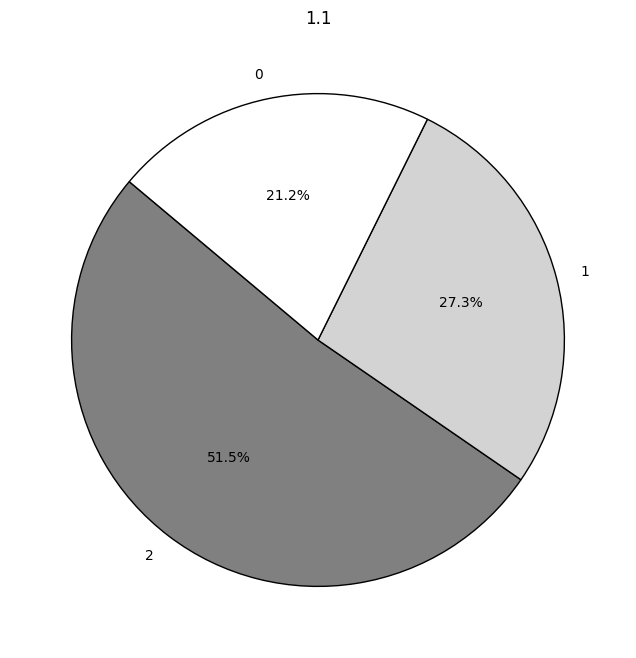

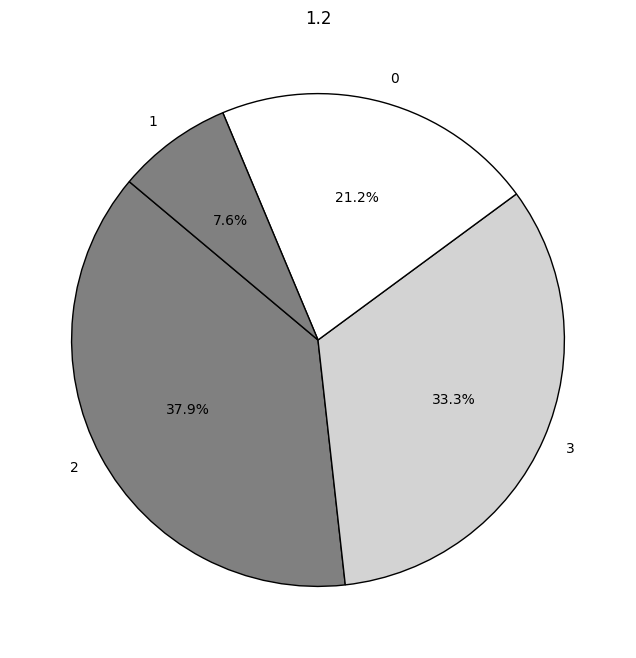

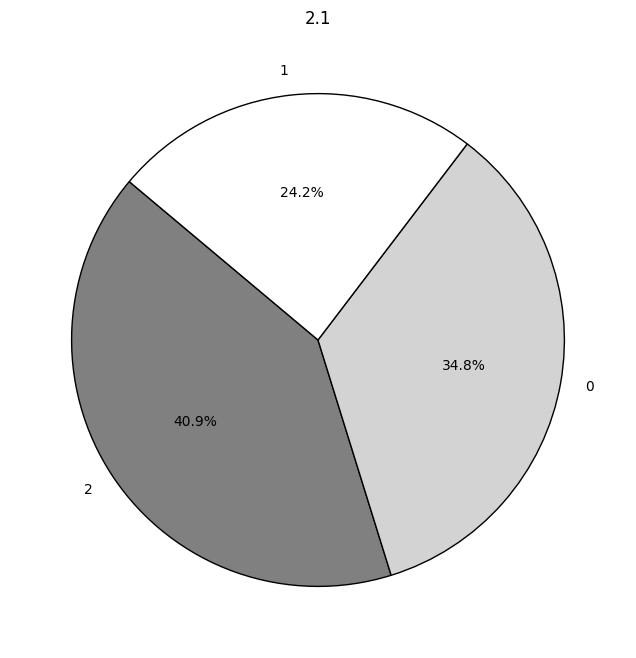

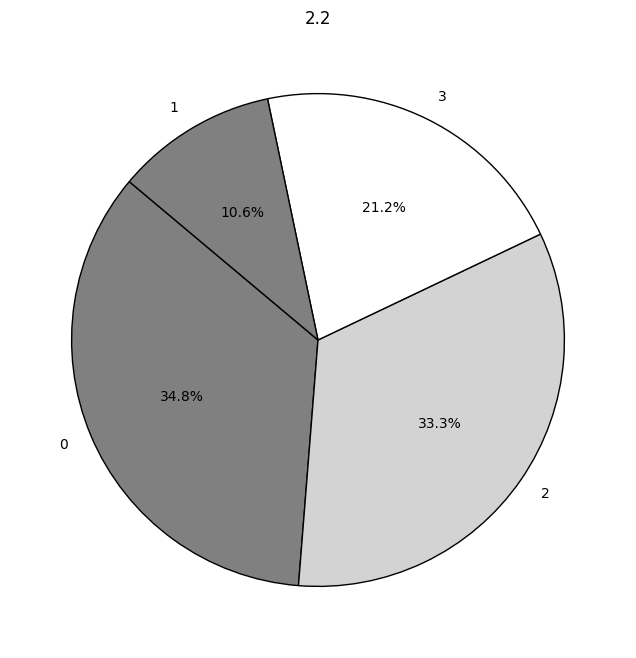

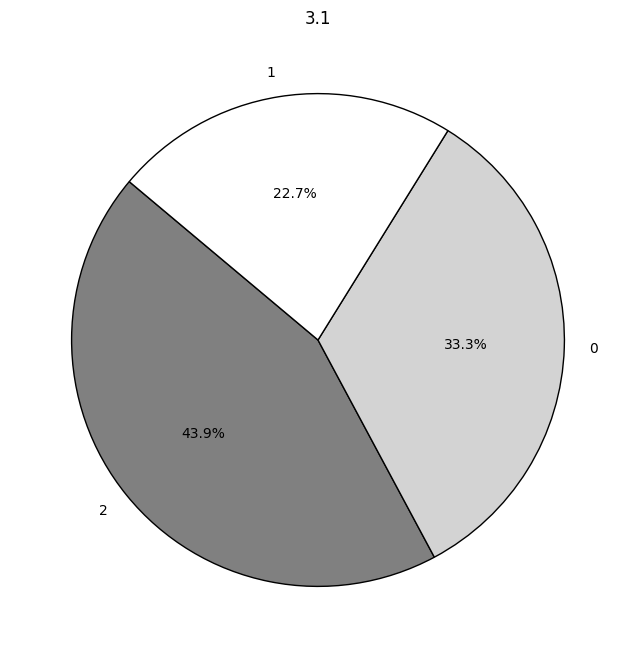

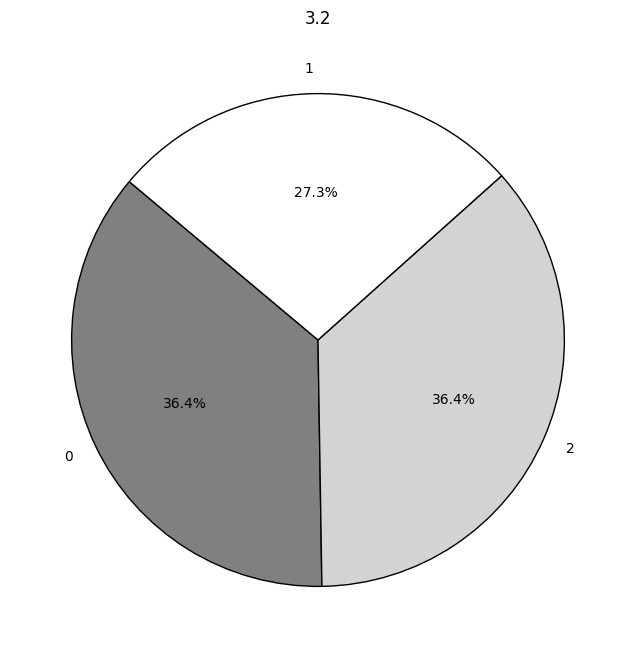

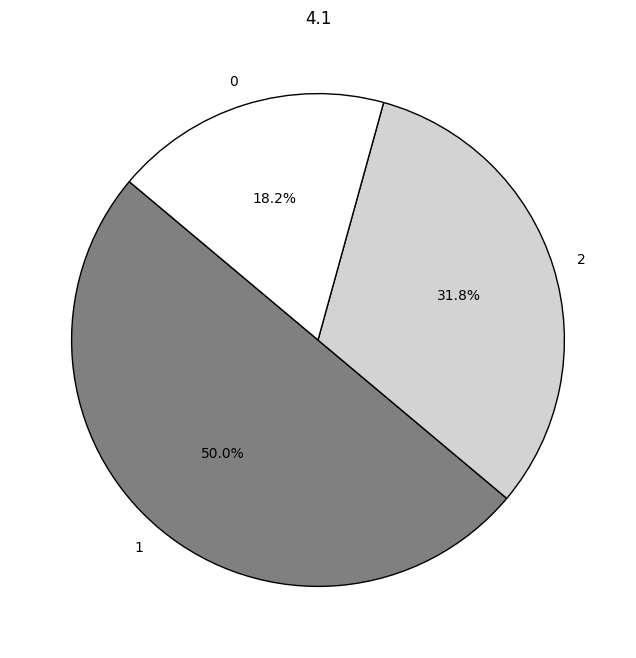

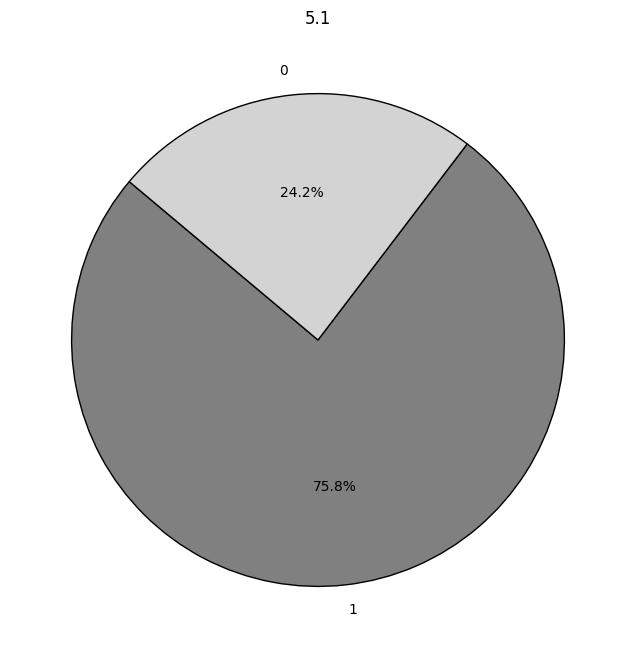

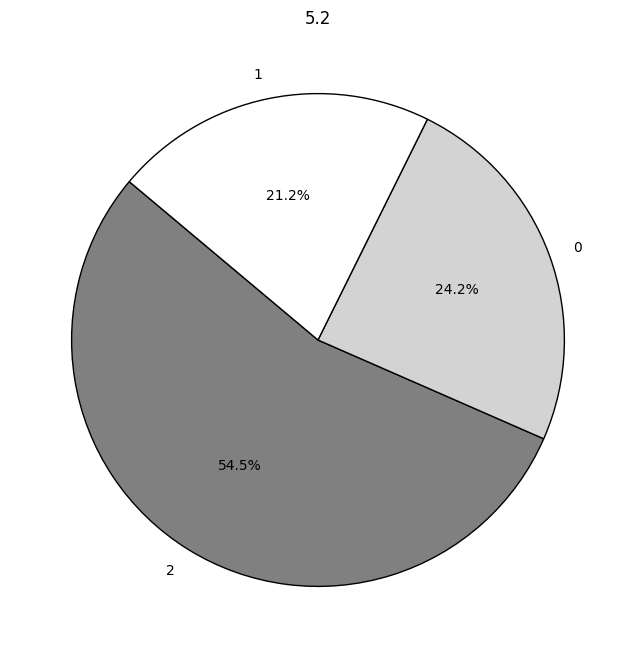

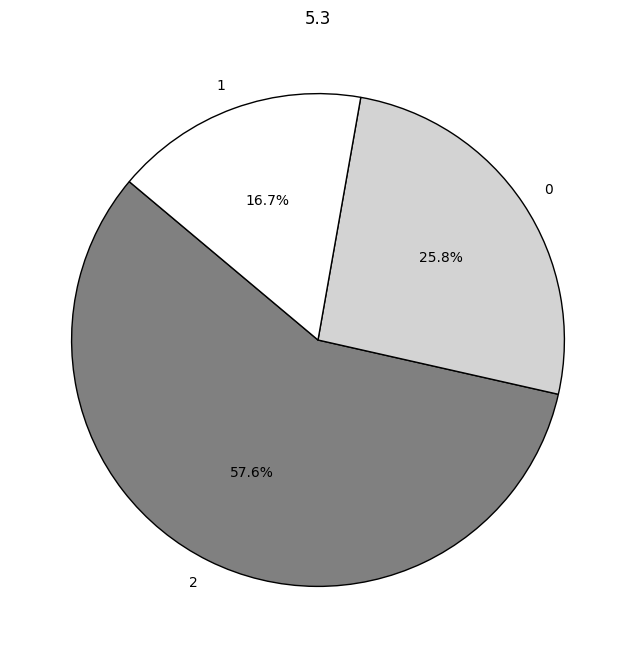

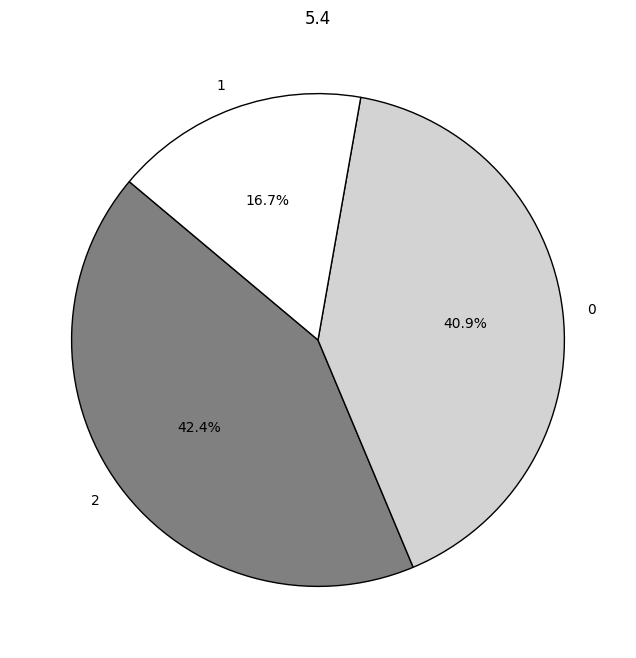

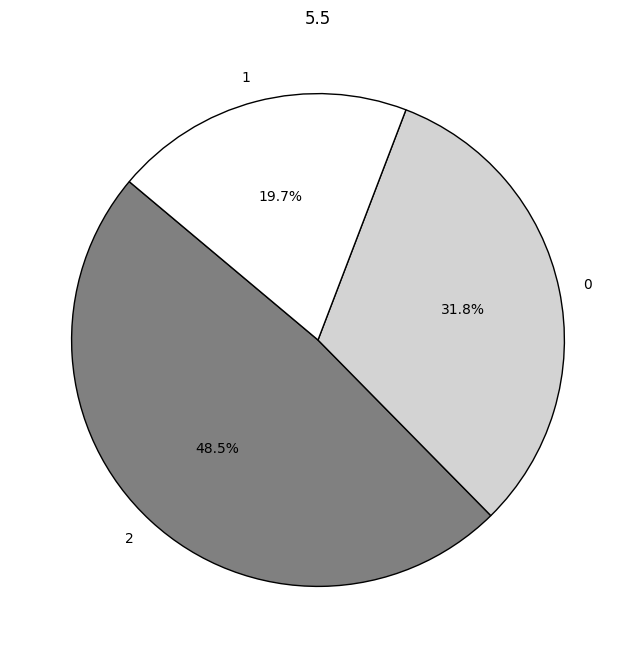

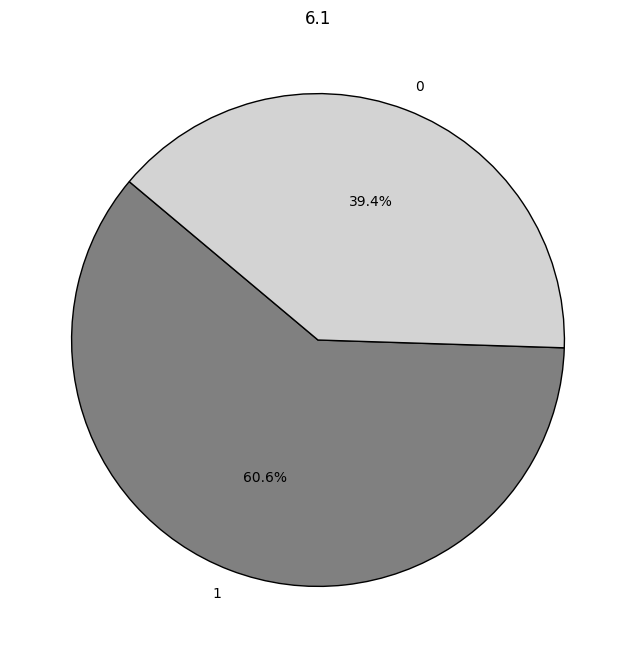

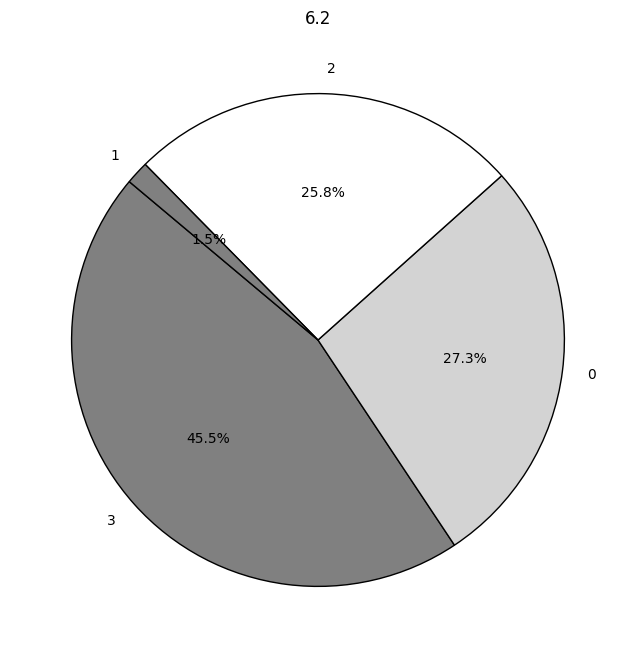

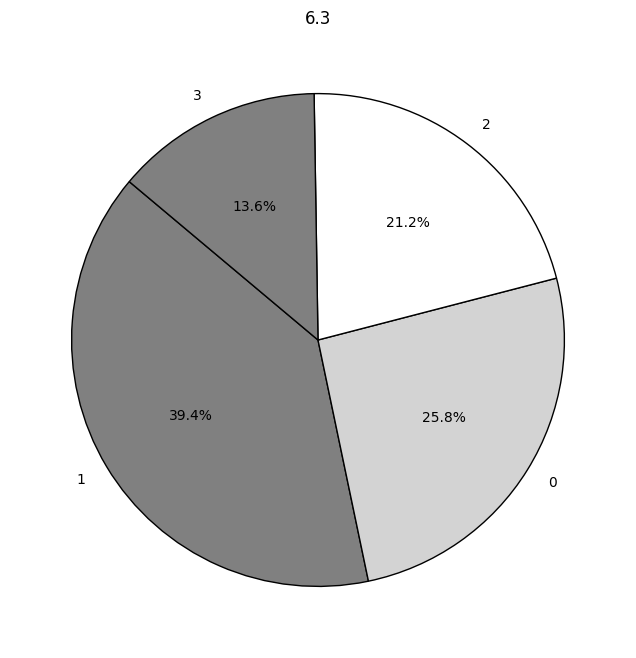

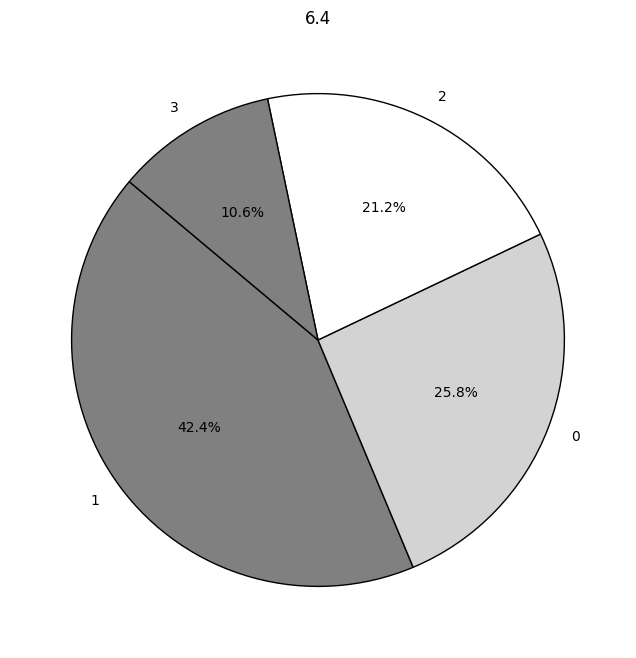

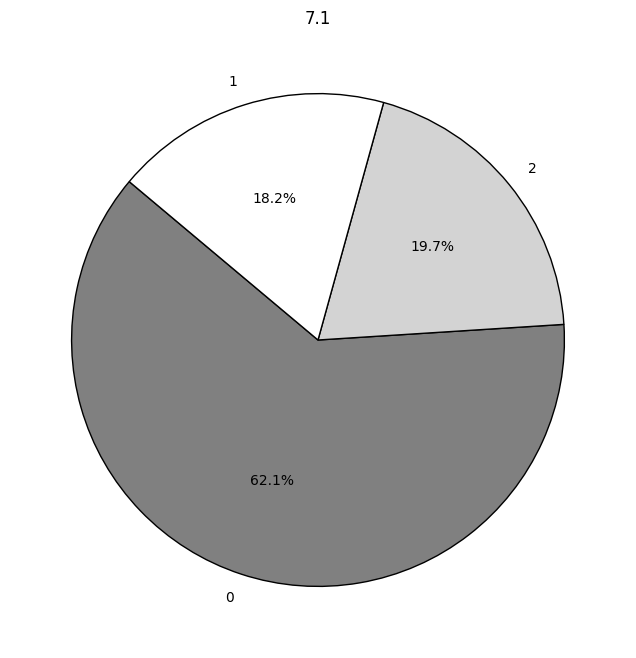

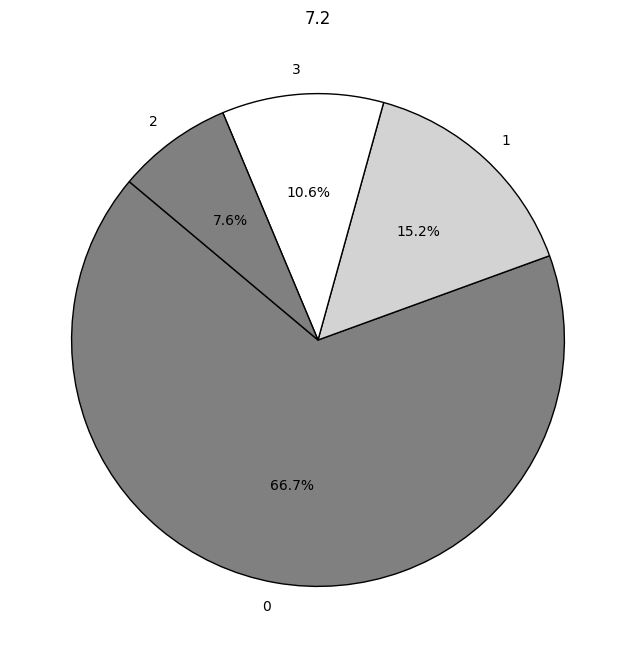

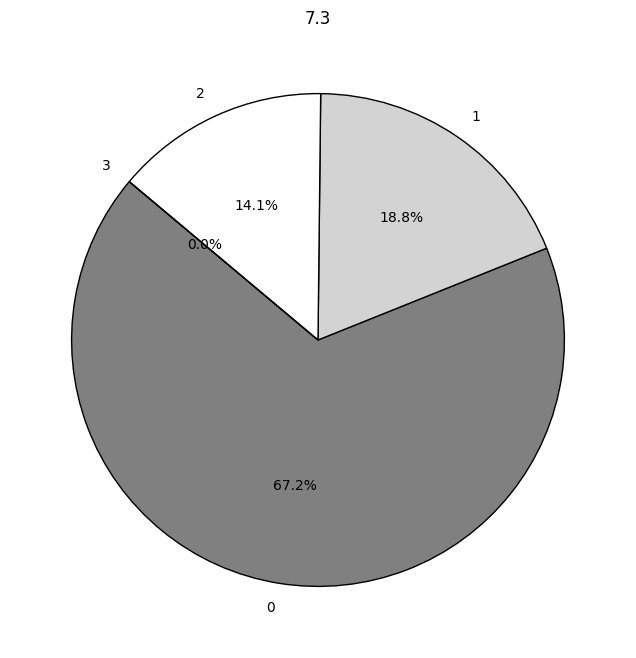

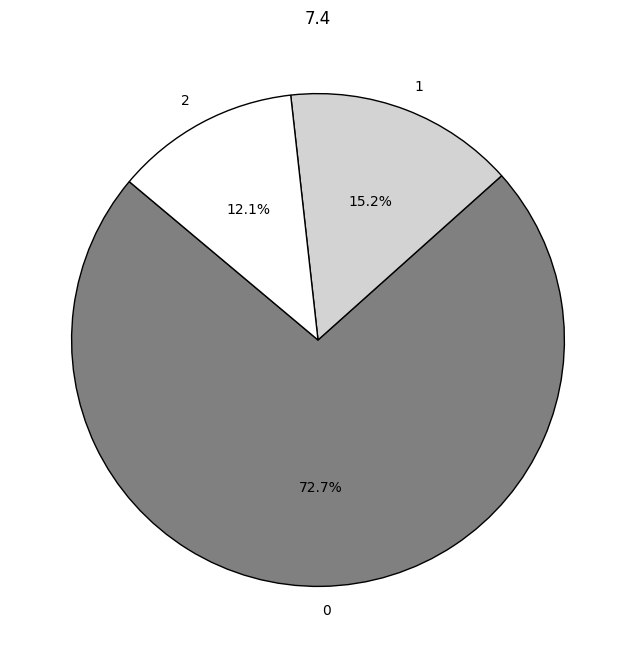

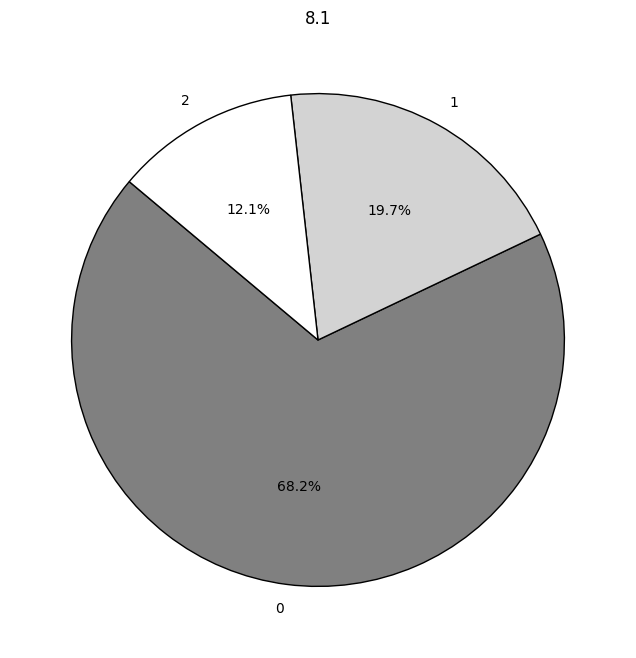

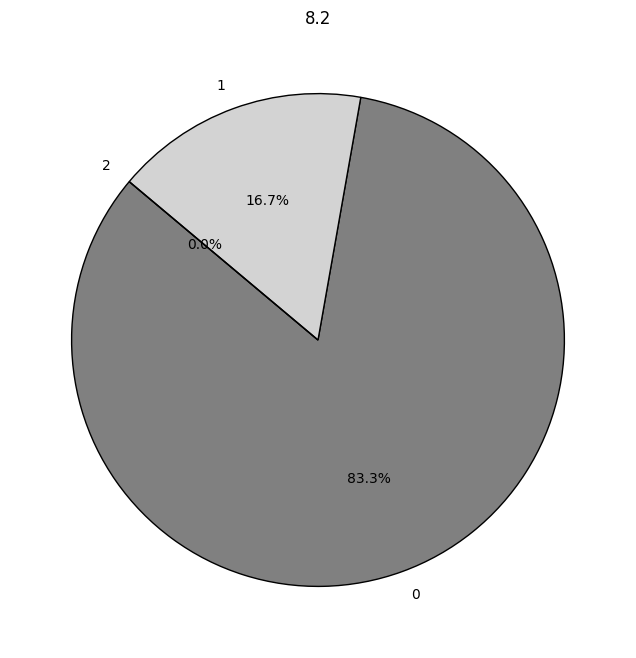

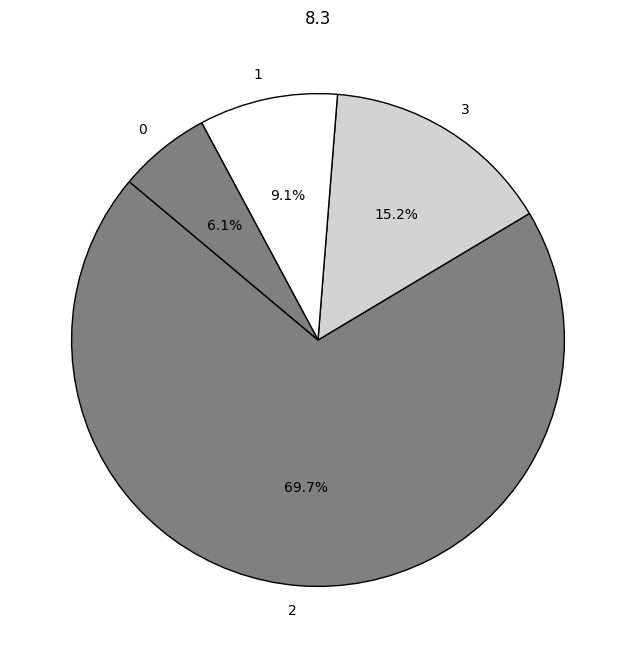

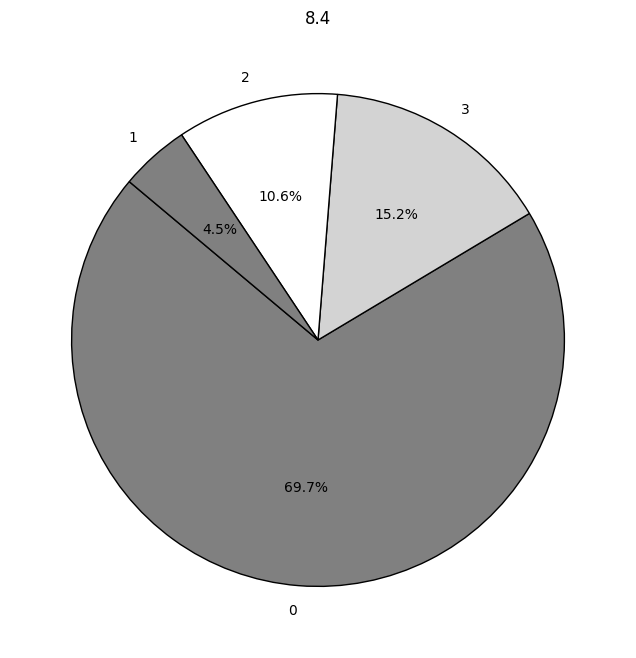

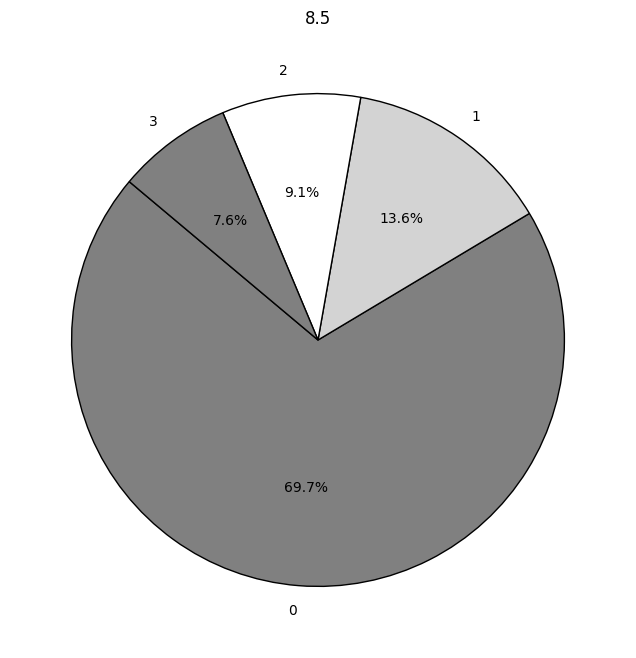

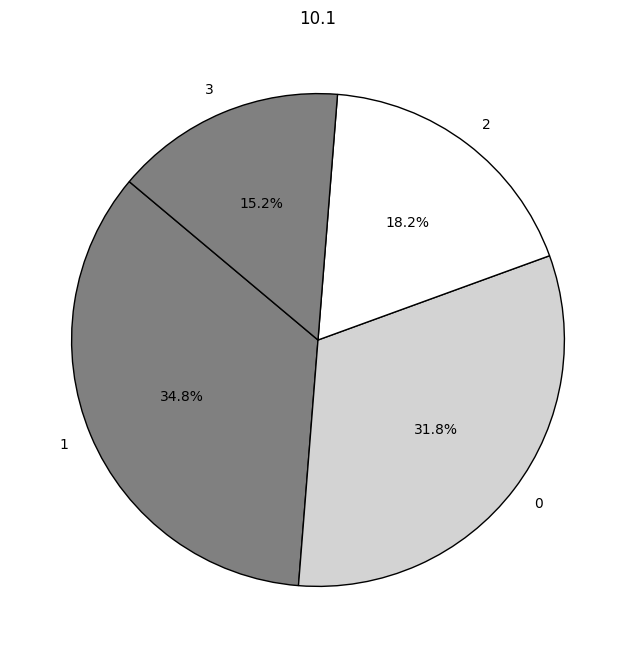

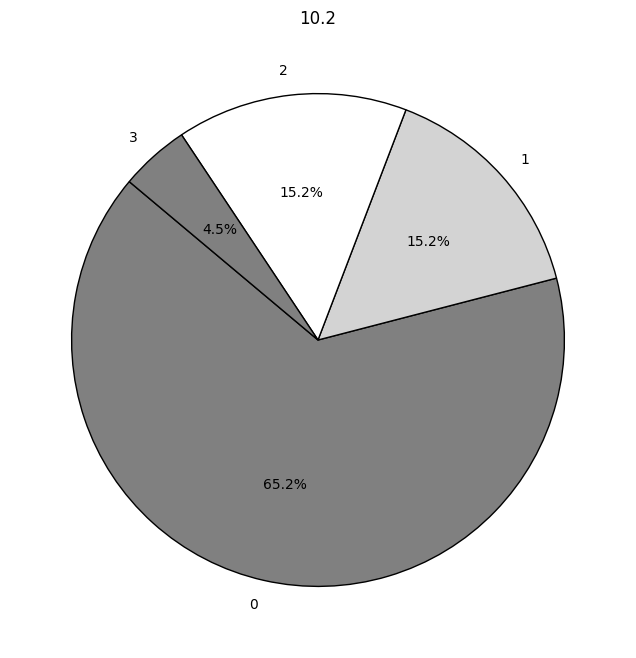

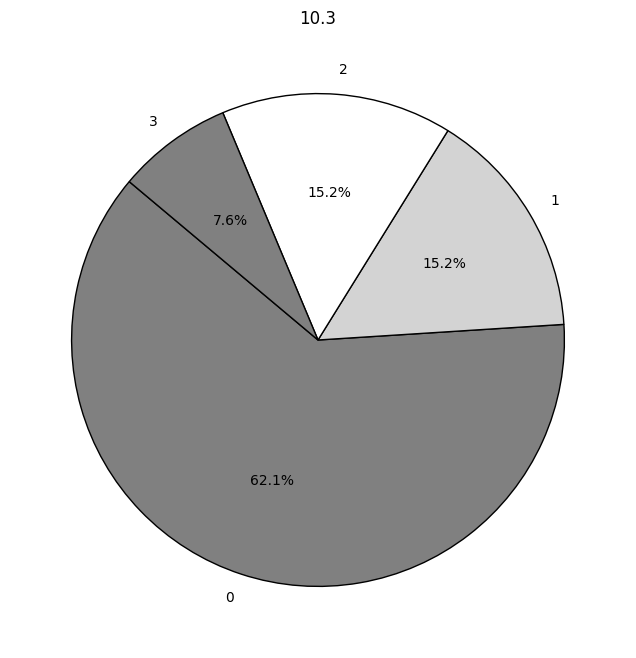

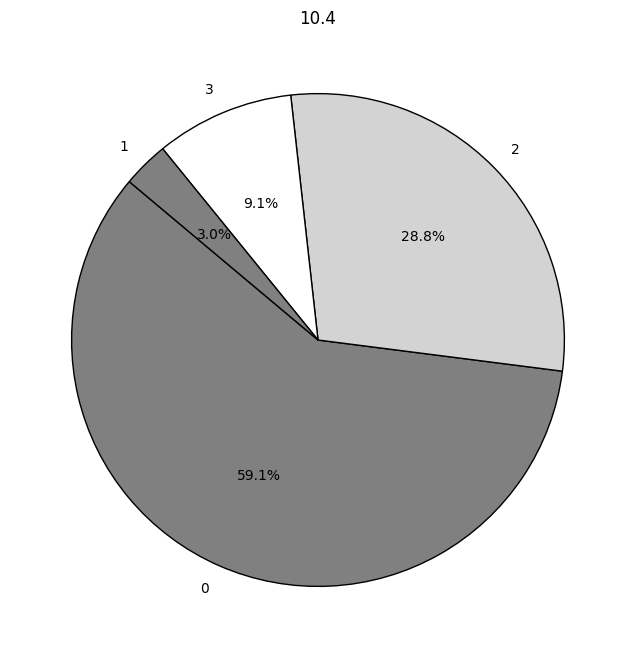

In [237]:
# graficas df pre_new
for col in pre_new.columns:
    if col != 'NOMBRE':
        graficar_pastel(pre_new, col)

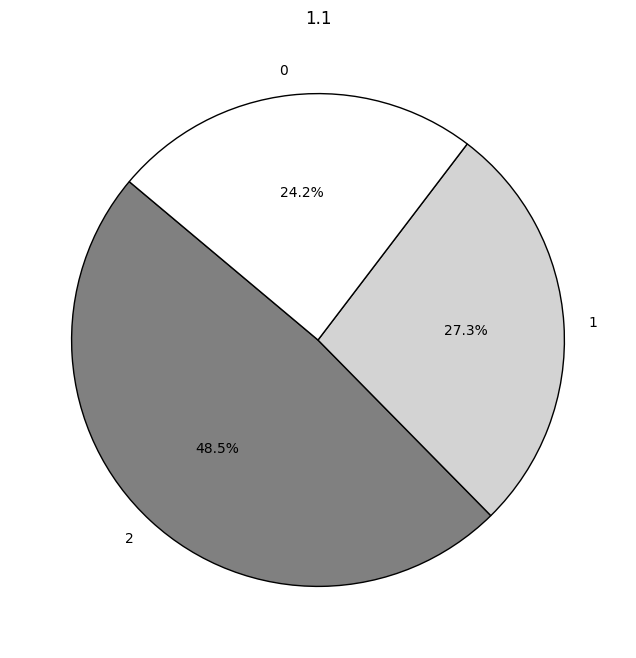

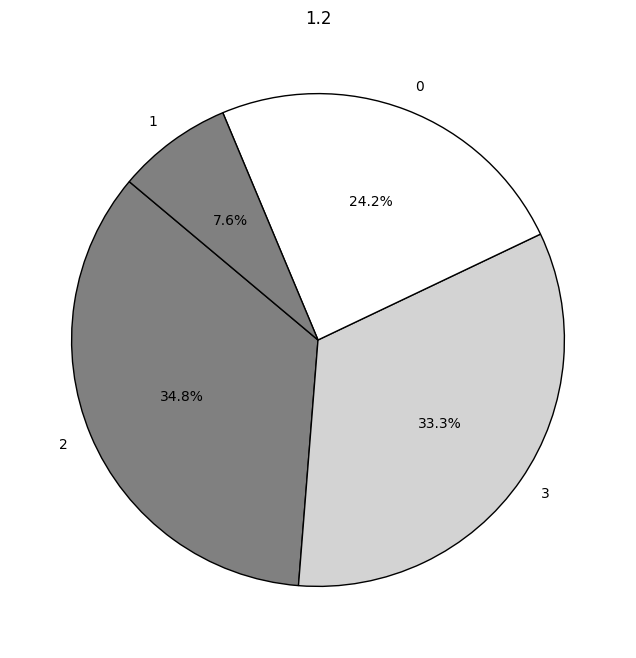

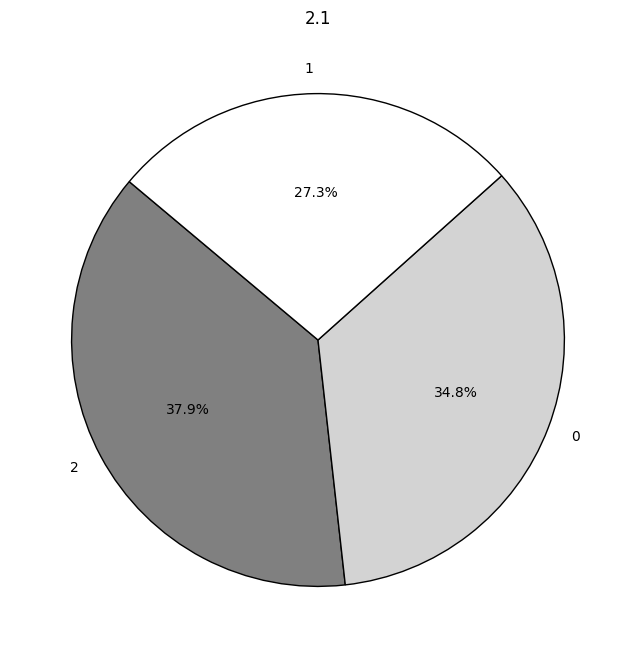

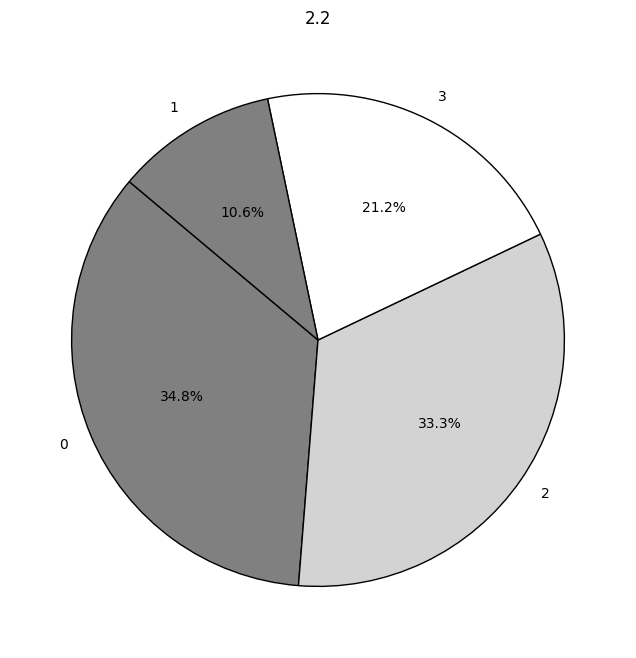

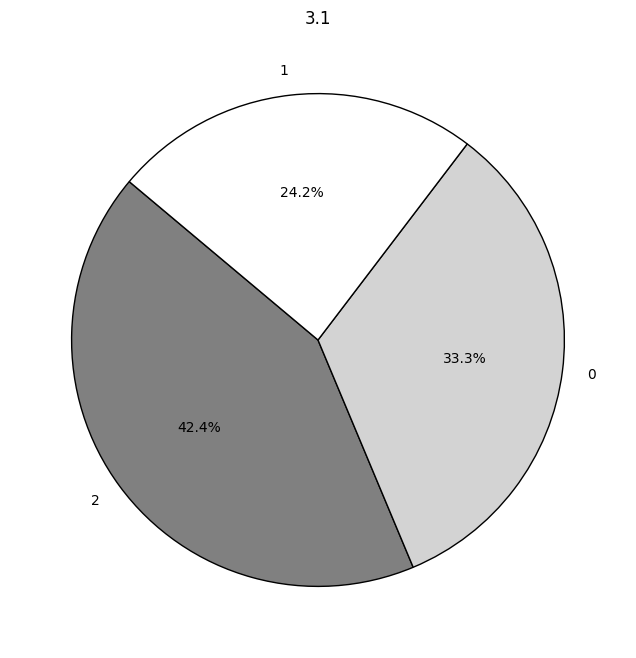

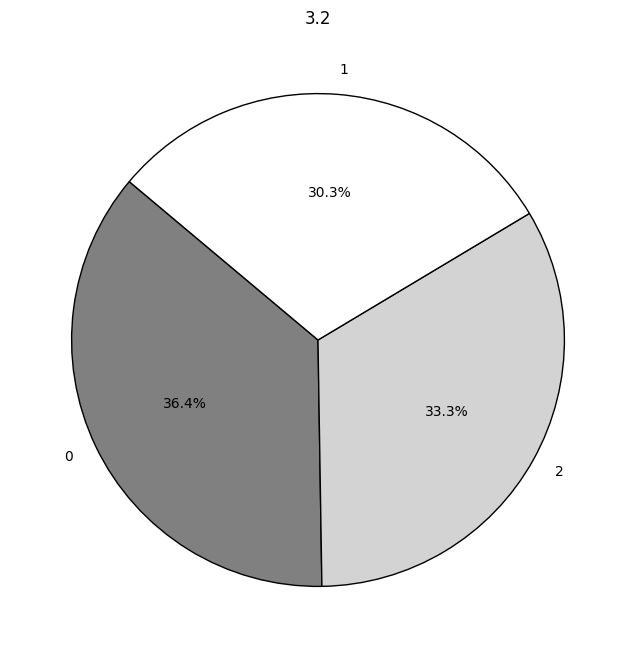

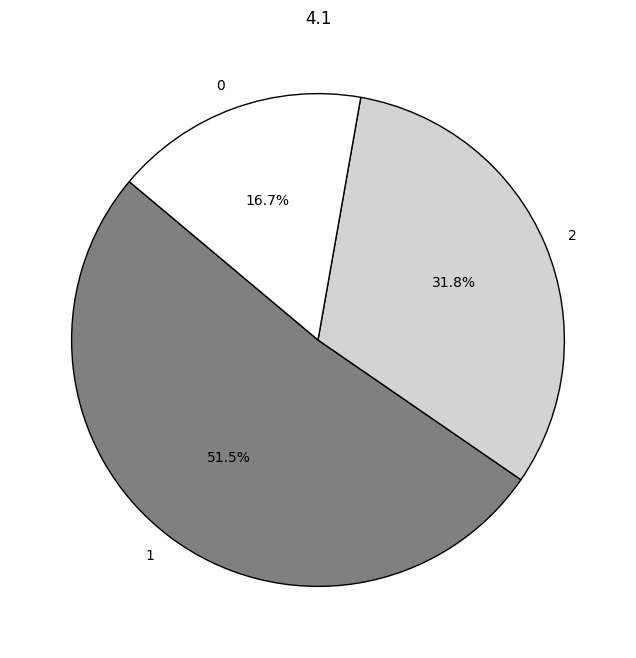

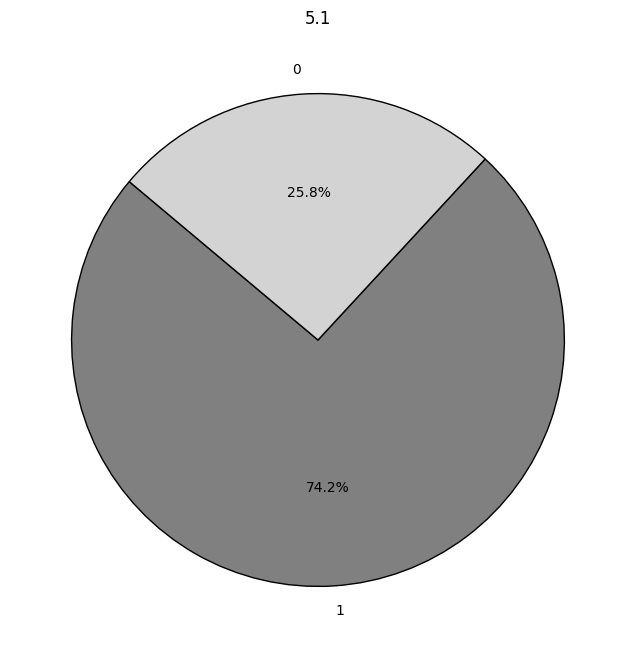

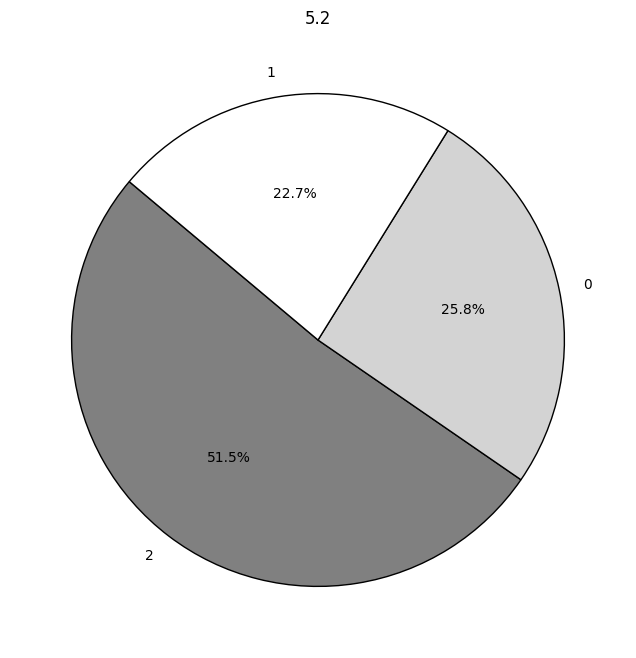

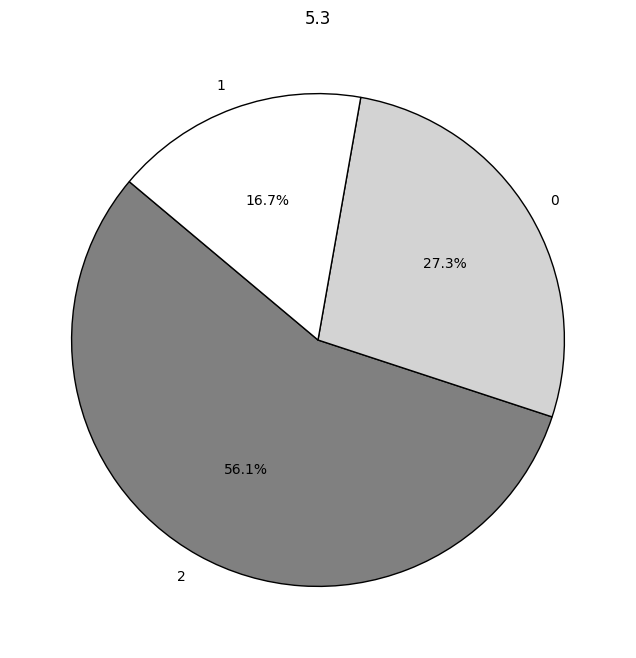

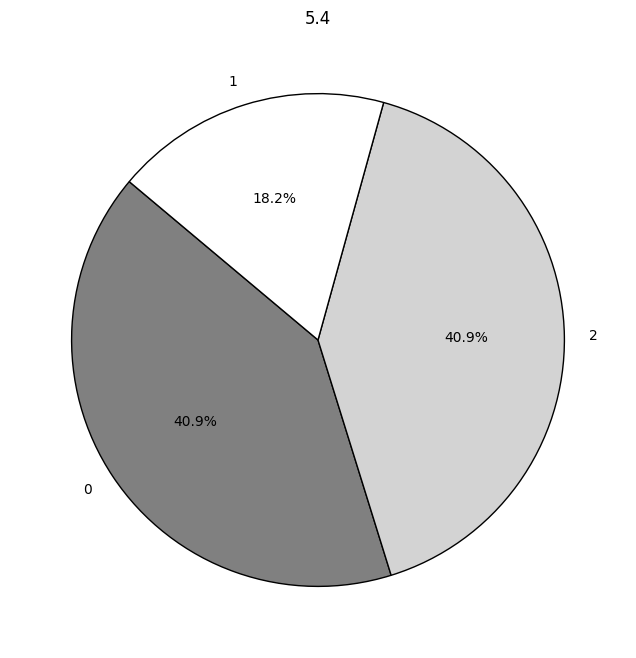

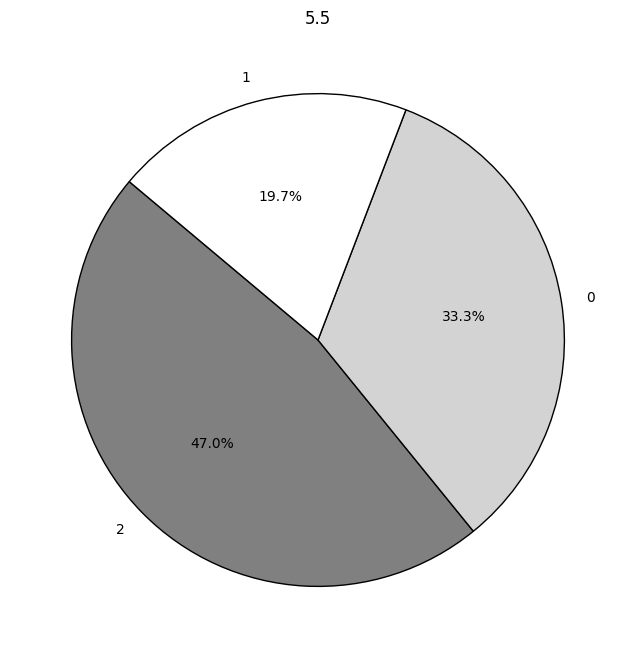

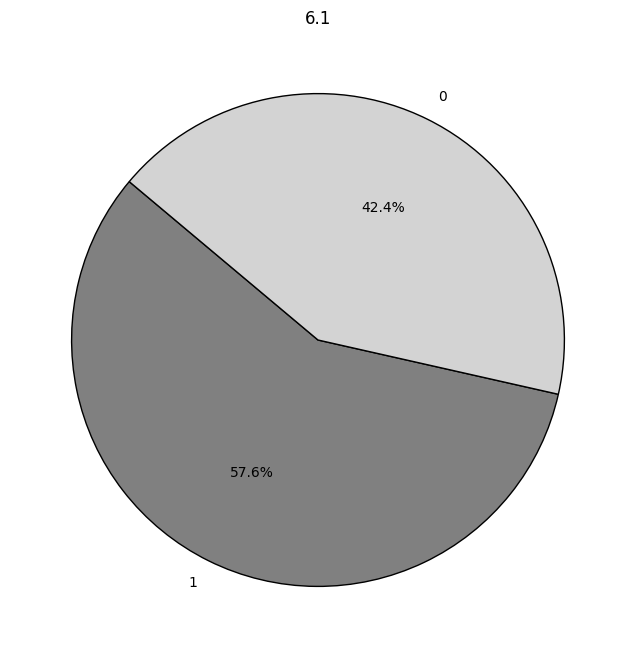

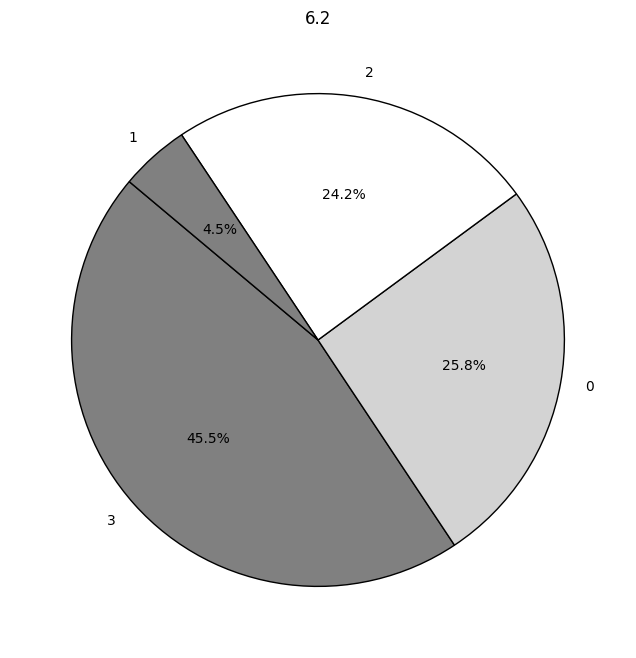

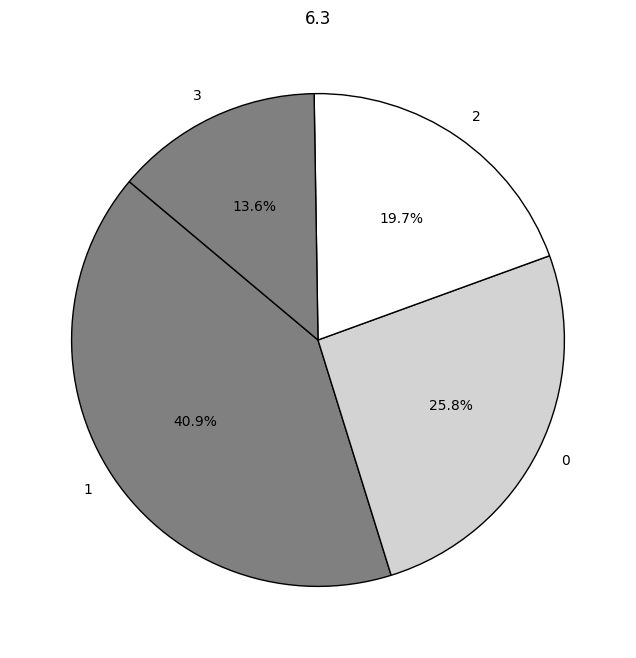

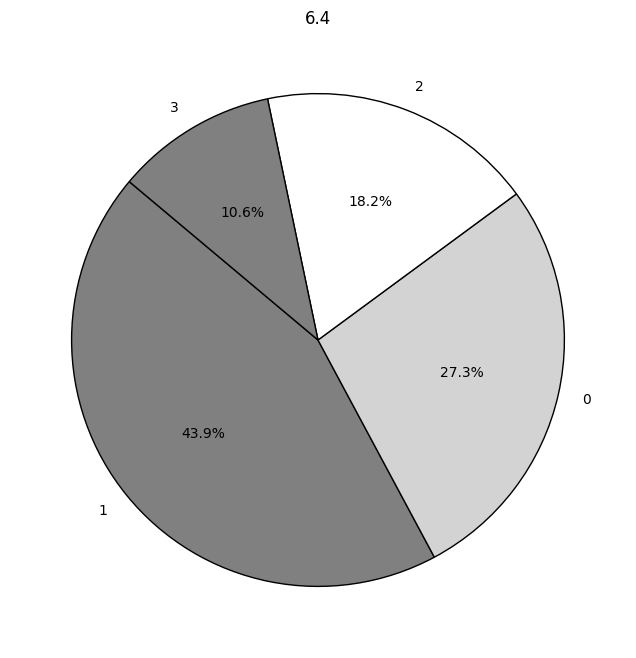

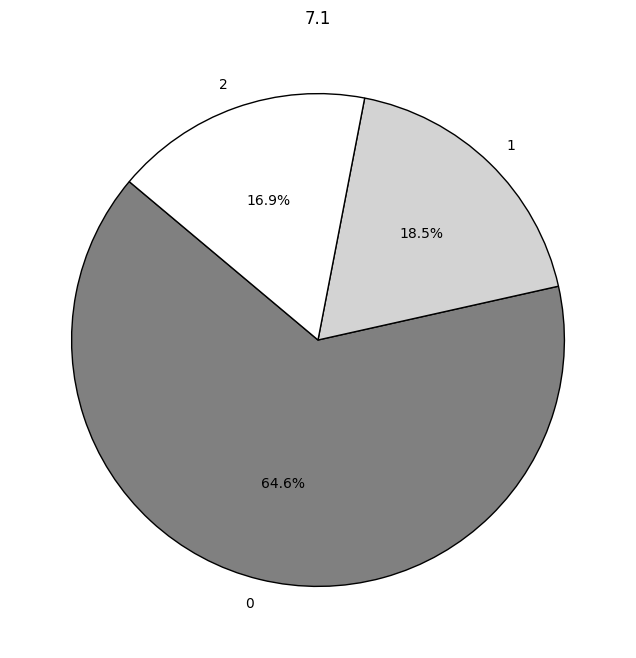

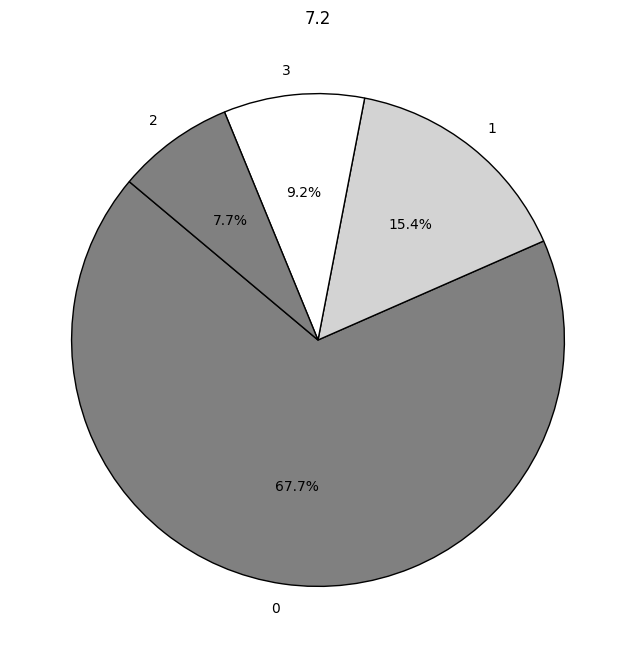

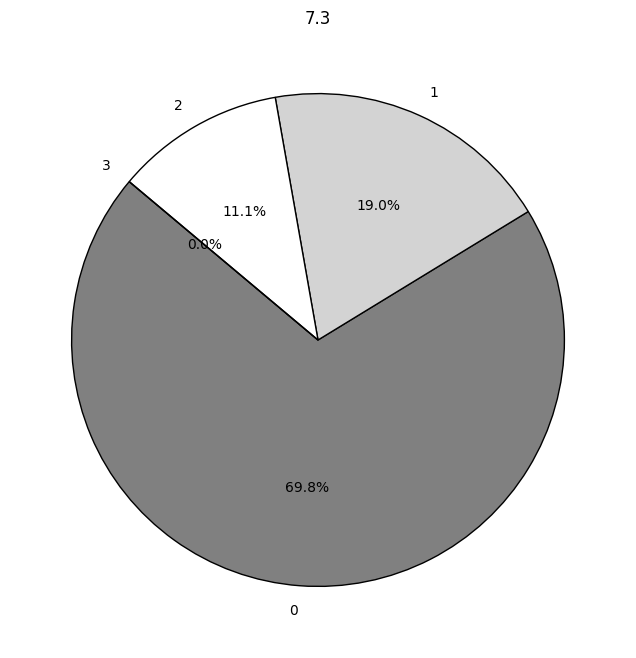

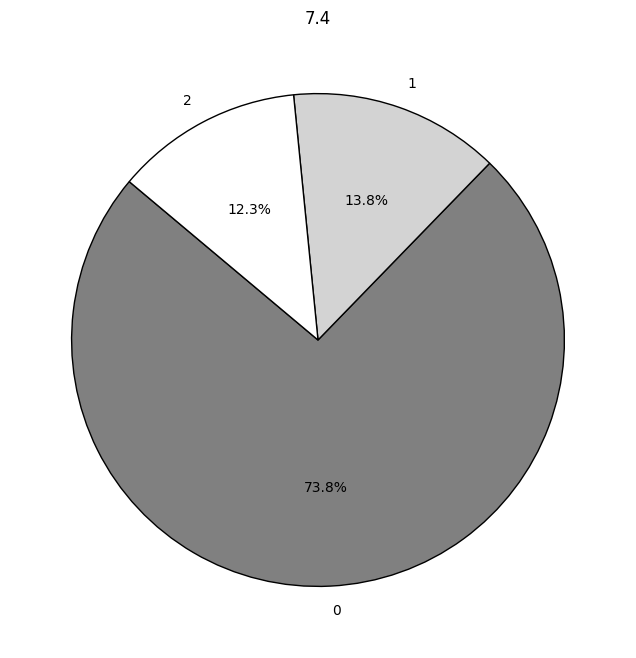

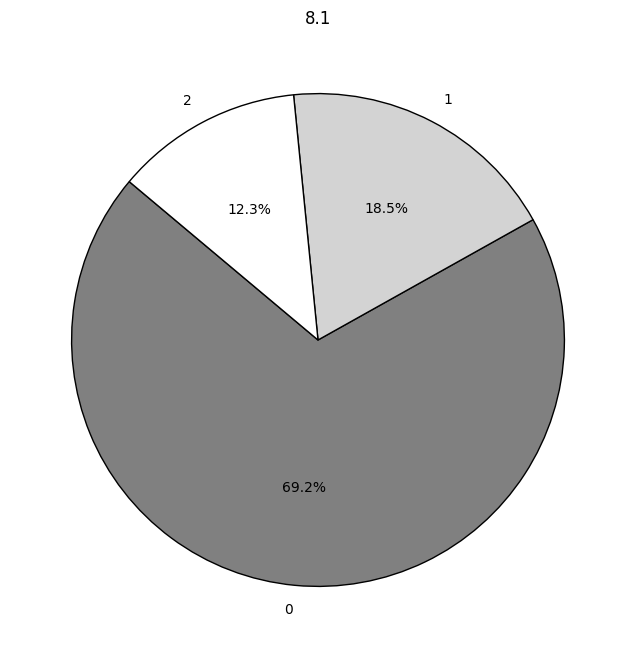

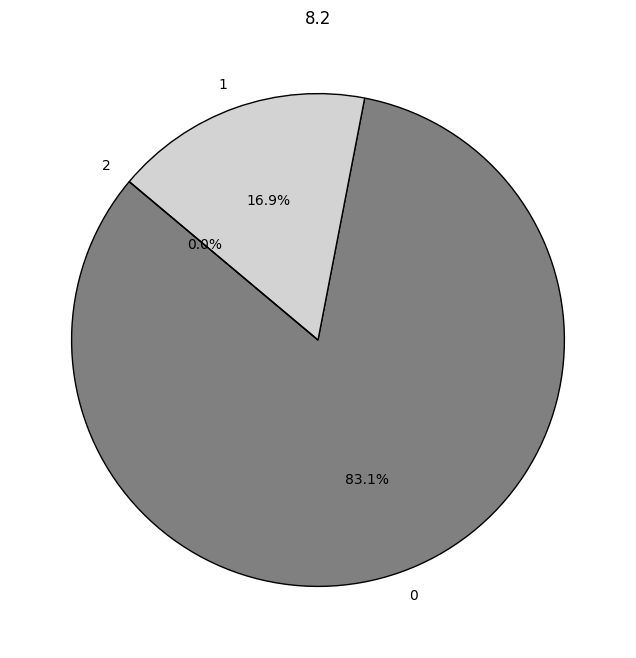

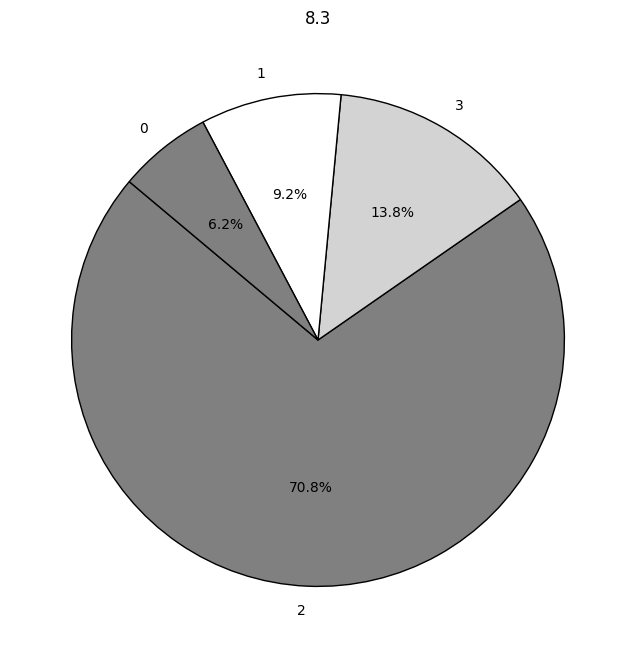

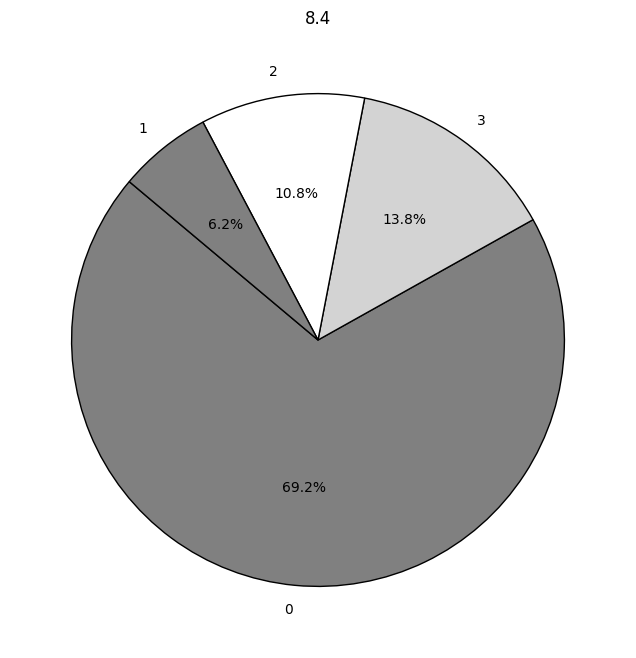

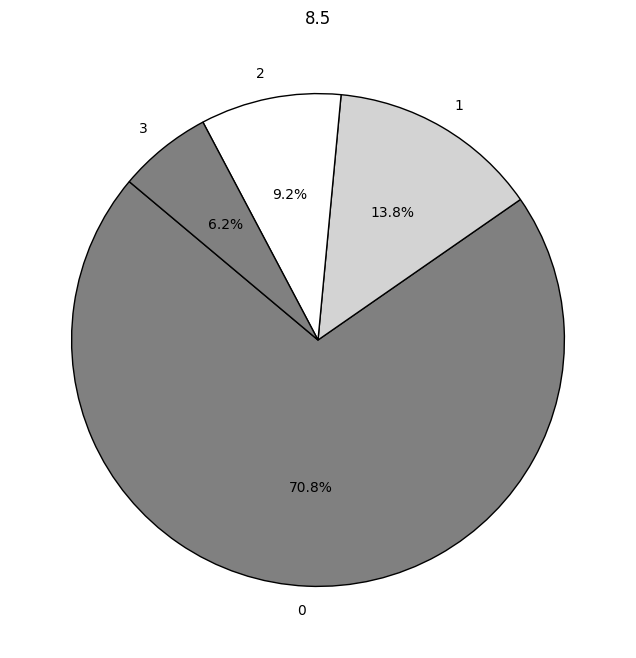

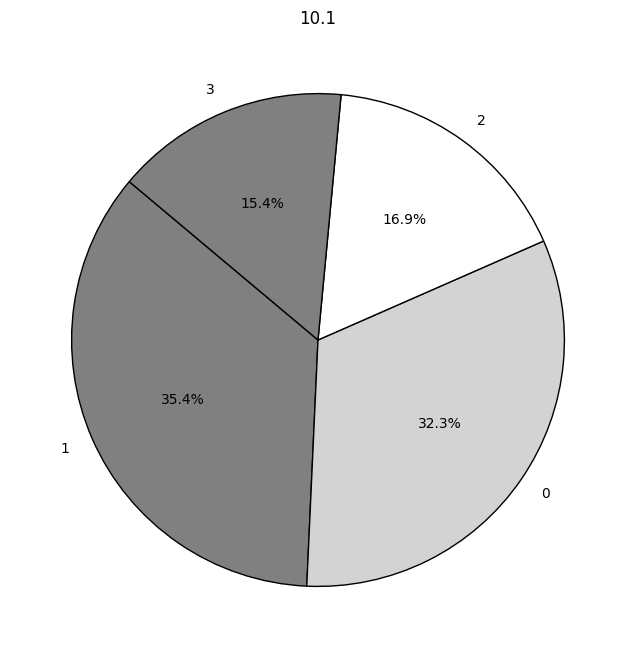

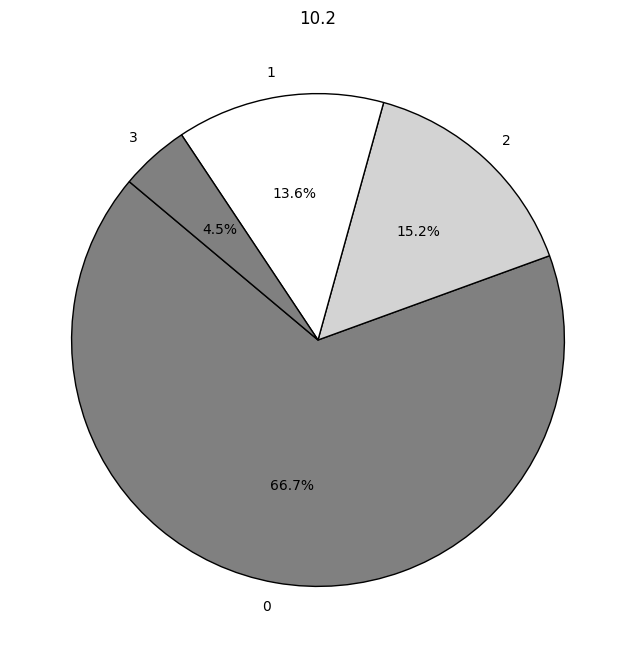

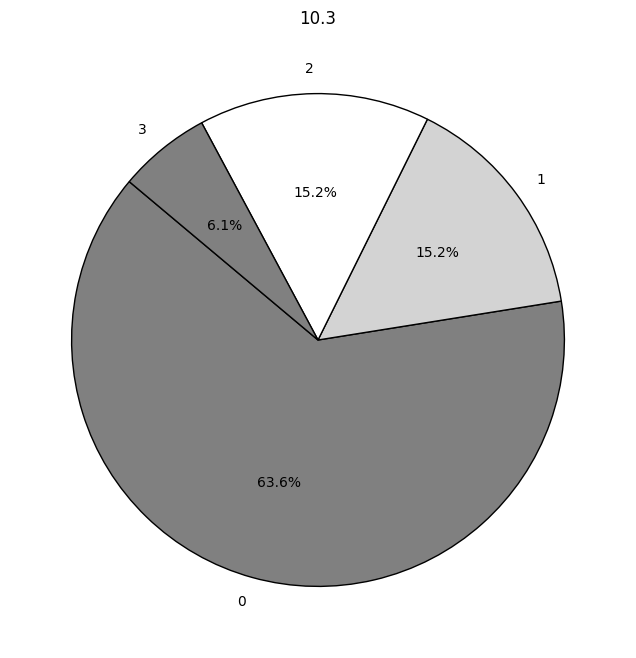

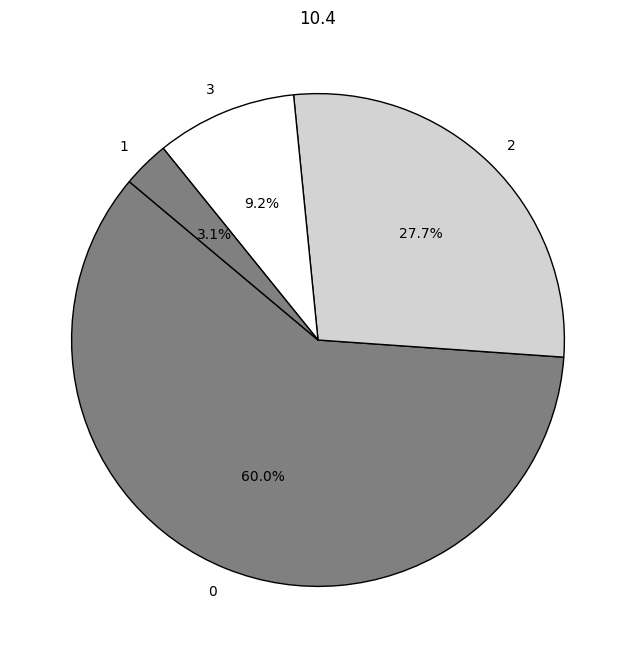

In [238]:
# graficas df post_new
for col in post_new.columns:
    if col != 'NOMBRE ':
        graficar_pastel(post_new, col)

In [222]:
# dividir variables para pruebas estadísticas
ordinales = ['1.2', '2.2', '6.2', '7.2', '3.2', '4.1', '5.5',
             '6.3', '6.4', '7.3', '8.2', '10.3']
nominales_dic = ['5.1', '6.1']
nominales_no_dic = ['1.1', '2.1', '3.1', '5.2', '5.3',
                    '5.4', '7.1', '7.4', '8.1', '8.3',
                    '8.4', '8.5', '10.1', '10.2', '10.4']

In [223]:
resultados = []
alpha = 0.05

In [226]:
# wilcoxon
for col in ordinales:
    stat, p_val = wilcoxon(pre_new[col], post_new[col])
    es_significativo = p_val <= alpha
    resultados.append({'Pregunta': col, 'Tipo': 'Ordinal',
                       'Estadístico': stat, 'p-value': p_val,
                       'Significativo': es_significativo})

In [227]:
# McNemar
for col in nominales_dic:
    tabla_contingencia = pd.crosstab(pre_new[col], post_new[col])
    resultado_mcnemar = mcnemar(tabla_contingencia)
    es_significativo = resultado_mcnemar.pvalue <= alpha
    resultados.append({'Pregunta': col, 'Tipo': 'Nominal Dicotómica',
                       'Estadístico': resultado_mcnemar.statistic,
                       'p-value': resultado_mcnemar.pvalue,
                       'Significativo': es_significativo})

In [230]:
# chi-cuadrada
for col in nominales_no_dic:
    tabla_contingencia = pd.crosstab(pre_new[col], post_new[col])
    chi2, p_val, dof, ex = chi2_contingency(tabla_contingencia)
    es_significativo = p_val <= alpha
    resultados.append({'Pregunta': col, 'Tipo': 'Nominal No Dicotómica',
                       'Estadístico': chi2, 'p-value': p_val,
                       'Significativo': es_significativo})

In [235]:
resultados1 = pd.DataFrame(resultados)

In [236]:
# corrección FDR
n_comparaciones = len(resultados)
resultados1['Rank'] = resultados1['p-value'].rank()
resultados1['BH_threshold'] = (resultados1['Rank'] / n_comparaciones) * alpha
resultados1['Significativo (BH)'] = resultados1['p-value'] <= resultados1['BH_threshold']

print(resultados1)

   Pregunta                   Tipo  Estadístico   p-value  Significativo  \
0       1.2                Ordinal   536.500000  0.767054          False   
1       2.2                Ordinal   428.000000  0.973785          False   
2       6.2                Ordinal   404.500000  0.940258          False   
3       7.2                Ordinal          NaN       NaN          False   
4       3.2                Ordinal   621.000000  0.868475          False   
5       4.1                Ordinal   324.000000  0.881206          False   
6       5.5                Ordinal   494.000000  0.990387          False   
7       6.3                Ordinal   498.500000  0.824653          False   
8       6.4                Ordinal   420.000000  0.685757          False   
9       7.3                Ordinal          NaN       NaN          False   
10      8.2                Ordinal          NaN       NaN          False   
11     10.3                Ordinal   332.000000  0.764076          False   
12      1.2 

In [250]:
# k-means
pre_new.columns = pre_new.columns.str.strip()
post_new.columns = post_new.columns.str.strip()

# eliminar ultima fila con valores NaN
pre_new = pre_new.drop(pre_new.index[-1])
post_new = post_new.drop(post_new.index[-1])

combinado = pd.concat([pre_new, post_new], keys=['Pre', 'Post'])
combinado.reset_index(level=0, inplace=True)
combinado.rename(columns={'level_0': 'Intervencion'}, inplace=True)

In [276]:
vectores = combinado.iloc[:, 2:].to_numpy()

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [283]:
# ajustar y entrenar KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(vectores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [284]:
# obtener etiquetas
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# asigran etiquetas al df
combinado['Cluster'] = labels

In [285]:
combinado

,Intervencion,NOMBRE,1.1,1.2,2.1,2.2,3.1,3.2,4.1,5.1,...,8.1,8.2,8.3,8.4,8.5,10.1,10.2,10.3,10.4,Cluster
0,Pre,abigail amaro colmenero,1,1,0,0,0,0,2,1,...,0,0,2,0,0,3,1,1,3,0
1,Pre,abner eli chavira jaquez,1,2,2,2,1,0,2,0,...,0,0,2,0,0,0,1,1,2,0
2,Pre,adamari janeth montoya burciaga,2,3,2,2,2,2,1,1,...,1,0,1,2,1,1,0,0,0,0
3,Pre,alan joaquin vargas perez,1,1,0,0,0,0,2,0,...,1,0,0,3,2,1,0,0,0,0
4,Pre,alejandra acosta andrade,2,3,2,3,2,2,1,1,...,0,0,2,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Post,rodrigo maldonado favela,0,0,0,0,0,0,0,1,...,2,1,3,1,3,0,0,3,2,0
60,Post,salma veronica ruiz salas,2,3,1,2,2,2,1,1,...,1,0,3,3,1,2,2,0,0,1
61,Post,sebastian saldana hernandez,2,2,1,1,2,2,1,0,...,1,0,0,3,2,2,2,1,2,0
62,Post,sendy gabriela aguirre barba,0,0,1,2,1,1,1,0,...,0,0,2,1,0,2,2,2,3,0


In [286]:
# reduccion a 3 dimensiones para la visualización usando t-SNE
tsne = TSNE(n_components=3, random_state=0)
vectores_reduced = tsne.fit_transform(vectores)

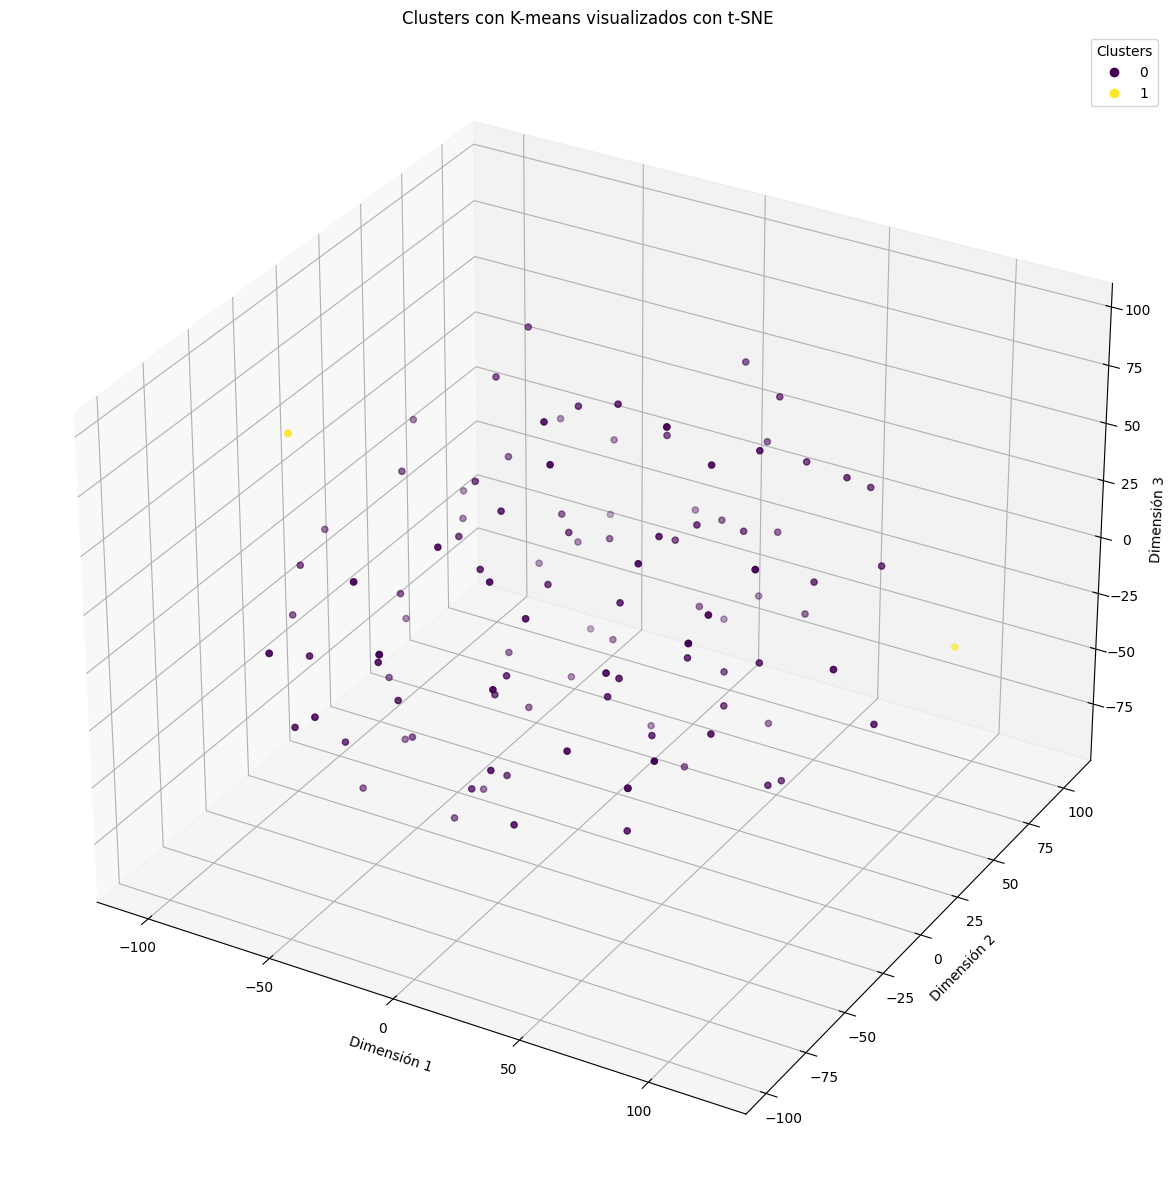

   Intervencion                           NOMBRE  Cluster
0           Pre          abigail amaro colmenero        0
1           Pre         abner eli chavira jaquez        0
2           Pre  adamari janeth montoya burciaga        0
3           Pre        alan joaquin vargas perez        0
4           Pre         alejandra acosta andrade        0
..          ...                              ...      ...
59         Post         rodrigo maldonado favela        0
60         Post        salma veronica ruiz salas        1
61         Post      sebastian saldana hernandez        0
62         Post     sendy gabriela aguirre barba        0
63         Post   sergio diego santiesteban soto        0

[128 rows x 3 columns]


In [288]:
# visualización
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(vectores_reduced[:, 0], vectores_reduced[:, 1], vectores_reduced[:, 2], c=labels, cmap='viridis')
plt.title('Clusters con K-means visualizados con t-SNE')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
plt.legend(*sc.legend_elements(), title="Clusters")
plt.show()

print(combinado[['Intervencion', 'NOMBRE', 'Cluster']])